# **Part 1: Transformers**
## **Task 1 (50 points):** In this task you should work with the Facebook BART model
(https://huggingface.co/docs/transformers/en/model_doc/bart) to provide text summarization
of news articles. Text summarization in Natural Language Processing (NLP) is a technique that
breaks down long texts into sentences or paragraphs, while retaining the text's meaning and
extracting important information. Pick any one dataset of your choice from
https://data.world/datasets/news-dataset.
You may have to perform data cleaning, preprocessing etc. Next, perform the following tasks:
1. Provide a description of the dataset you selected. Split your data into train-test set with
a (90-10) split.
2. Load the model from Hugging Face’s Transformers library and write its training script.
3. Fine tune the pre-trained model with your data and report results on your test set. You
must report the BLEU and ROUGE Scores. (See the code provided in class for more
details)
4. Analyze your results and discuss the impact of hyperparameters. Are your results
impacted by the choice of the LLM here? How?

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install --upgrade urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import json

# Load the dataset
with open('/content/drive/MyDrive/Projects_ML_AI/bbc_news_list_uk.json', 'r') as file:
    data = json.load(file)

# Convert data to list of dictionaries
articles = []
for article in data:

    articles.append(article)
# Create a Pandas DataFrame
df = pd.DataFrame(articles)

# Display the DataFrame
df.head() # Display the first few rows of the DataFrame


,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
0,,Why quitting heroin substitute methadone is 'v...,2010-08-06T02:46:40.000Z,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en_GB,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,"05/02/2021, 17:19:39"
1,"North Korea, Kim Jong-un, Kim Jong-il, Kim Jon...",North Korea leader's eldest son 'opposes dynasty',2010-10-12T08:54:42.000Z,"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,,en_GB,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,"05/02/2021, 17:19:39"
2,,Paintings by gangster Reggie Kray go on sale i...,2010-10-27T17:35:24.000Z,"<div data-component=""text-block"" class=""ssrcss...",Seven oil paintings created by notorious gangs...,https://www.bbc.co.uk/news/uk-england-lincolns...,,en_GB,768e3fc6-c406-5570-8328-2e6fb75abd1b,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,"05/02/2021, 17:19:39"
3,,Bracklinn Falls Bridge hauled over gorge by hand,2010-10-08T13:21:50.000Z,"<div data-component=""text-block"" class=""ssrcss...",A 20-tonne bridge is being hauled into place b...,https://www.bbc.co.uk/news/uk-scotland-tayside...,,en_GB,a6e26396-70ec-501c-8ebc-1d600ddf6aab,Tayside and Central Scotland,A 20-tonne bridge is having to be hauled into ...,BBC News,"05/02/2021, 17:19:39"
4,,Manchester soldier's last words become song,2010-09-22T17:35:34.000Z,"<div data-component=""text-block"" class=""ssrcss...",The final words written by a guardsman killed ...,https://www.bbc.co.uk/news/uk-england-manchest...,,en_GB,e8a150a5-b6e0-5315-9c04-fc639dee196f,Manchester,The final words written by a guardsman from Ma...,BBC News,"05/02/2021, 17:19:39"


In [4]:
from sklearn.model_selection import train_test_split

# Perform train-test split
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['category'] if 'category' in df.columns else None, random_state=42)

# Display the shape of the train and test sets
print("Train set size:", train_df.shape)
print("Test set size:", test_df.shape)

Train set size: (14242, 13)
Test set size: (1583, 13)


In [5]:
def convert_to_dict(row):
    # Initialize an empty dictionary to store the converted row
    converted_row = {}

    # Iterate over the columns in the row
    for column_name, column_value in row.items():
        # Add each column to the converted row dictionary
        converted_row[column_name] = column_value

    return converted_row


In [6]:
# from datasets import  load_dataset
# # Convert the training and test DataFrames to datasets
# train_dataset = datasets.from_pandas(train_df.map(convert_to_dict))
# test_dataset = datasets.from_pandas(test_df.map(convert_to_dict))

# # Organize the datasets into a DatasetDict
# datasets = datasets.DatasetDict({"train": train_dataset, "test": test_dataset})

In [7]:
from transformers import pipeline

pipe = pipeline("text-generation", model = 'gpt2-medium')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [8]:
input_text = train_df['content'][0][:2000]
print(f"input text size: {len(input_text)}")
query = input_text + '\nTL;DR:\n'
pipe_out = pipe(query, max_length = 512, clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


input text size: 2000


In [9]:
pipe_out[0]['generated_text'][len(query):]

'"Drugs should never be taken into account when evaluating people\'s future health or welfare."\n"We need a long-term plan for public health, which doesn\'t put the risk of addiction before that of public wellbeing. "The health gap is huge when taking into consideration the number of people who get treated because it is so clear that the drugs we put'

In [10]:
summaries = {}
summaries['gpt-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

In [11]:
pipe_out[0]

{'generated_text': 'The heroin substitute methadone can be used as a way of weaning addicts off heroin but the substitute can also become addictive.Earlier this year a debate broke out in Scotland when Professor Neil McKeganey, director of the Centre for Drug Misuse Research at the University of Glasgow, said more effort was needed to get people off drugs, including methadone, through abstinence. But a group of 40 specialists, including university professors and doctors who treat addicts, responded: "If policy makers were to heed the critics\' advice to close down methadone treatment or impose an arbitrary time limit on its administration, the community can anticipate more overdose deaths, more HIV and more crime." So what do recovering addicts think? Chris used methadone for five years to help wean him off heroin but felt he had to quit the drug substitute last October"I just thought, I\'ve got to get a grip here, because I\'ve been in and out of prison since I was 16 - that\'s half m

In [12]:
pipe = pipeline('summarization', model='t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [13]:
pipe_out = pipe(input_text)

In [14]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

In [15]:
pipe = pipeline('summarization', model = 'facebook/bart-large-cnn')
pipe_out = pipe(input_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
pipe = pipeline('summarization', model = 'google/pegasus-cnn_dailymail')

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [17]:
pipe_out = pipe(input_text)

In [18]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [19]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print()


GPT-MEDIUM-380M
"Drugs should never be taken into account when evaluating people's future health or welfare."
"We need a long-term plan for public health, which doesn't put the risk of addiction before that of public wellbeing. "The health gap is huge when taking into consideration the number of people who get treated because it is so clear that the drugs we put

T5-BASE-223M
methadone can be used as a way of weaning addicts off heroin but it can also become addictive . experts say if policy makers heed critics' advice, "community can anticipate more overdose deaths, more HIV and more crime" of the 30 inmates resident last week 11 have become completely drug-free .

PEGASUS-CNN-568M
Heroin substitute methadone can be used as a way of weaning addicts off heroin .<n>But the drug substitute can also become addictive .<n>Chris, an inmate of HMP Edinburgh, lives in Ratho Hall, a specialist Addiction Support Area that helps prisoners achieve abstinence .



In [20]:
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [21]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [22]:
dialogue = []
for i in train_df['content']:
    dialogue.append(i)

print(dialogue[99])

A Worcestershire woman who was the youngest survivor of Britain's worst maritime disaster has called for it to be remembered on its 70th anniversary.Jacqueline Tanner, of Malvern, was aged two when the Lancastria was sunk by German bombs near the French port of St Nazaire in June 1940.Around 7,000 British servicemen and civilians fleeing the Nazis were killed.She has written to David Cameron asking him to recognise the disaster in 2010.Mrs Tanner said: "No government has really acknowledged that it happened and they won't have acknowledged a war grave."Why? I don't know, I've not had an answer."Mrs Tanner was living with her parents in Belgium when they had to flee the German invasion of France and the Low Countries in 1940.They eventually made their way to St Nazaire in France and boarded the Lancastria, a transatlantic liner taking part in the rescue of the remaining British personnel and civilians in France after the Dunkirk evacuation two weeks before.It was packed with around 9,00

In [23]:
dialogue_len = [ len(x.split()) for x in train_df['content']]
summary_len = [ len(x.split()) for x in train_df['short_description']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

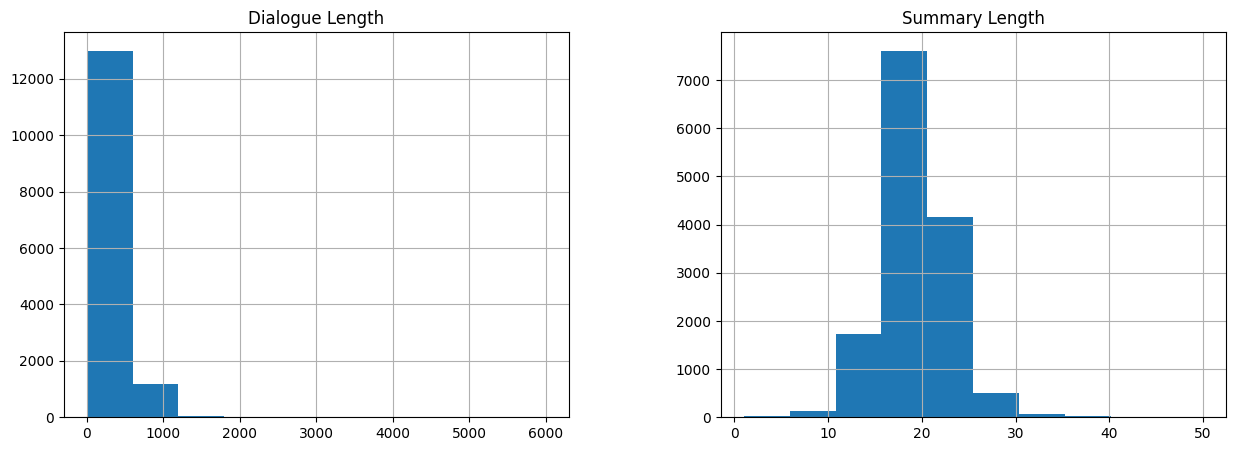

In [24]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T

data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize=(15,5))

In [25]:
def get_feature(batch):
    encodings = tokenizer(batch['content'], text_target=batch['short_description'],
                         max_length=1024, truncation=True)

    encodings = {'input_ids': encodings['input_ids'],
                 'attention_mask': encodings['attention_mask'],
                 'labels': encodings['labels']}

    return encodings

In [26]:
train_df_pt = train_df.apply(get_feature,axis=1)

In [27]:
train_df_pt

14747    {'input_ids': [0, 20770, 34, 373, 10, 2755, 34...
6173     {'input_ids': [0, 12815, 928, 3193, 3647, 4622...
4894     {'input_ids': [0, 4688, 9652, 693, 54, 342, 17...
13040    {'input_ids': [0, 250, 266, 88, 5, 499, 9, 10,...
5469     {'input_ids': [0, 133, 803, 88, 41, 1697, 1363...
                               ...                        
9488     {'input_ids': [0, 19814, 54, 563, 184, 26906, ...
13470    {'input_ids': [0, 250, 8572, 12, 180, 12, 279,...
15580    {'input_ids': [0, 3048, 1863, 9, 331, 5141, 22...
11787    {'input_ids': [0, 9497, 33, 703, 364, 12, 1430...
15544    {'input_ids': [0, 2], 'attention_mask': [1, 1]...
Length: 14242, dtype: object

In [28]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, dataframe, columns):
        self.dataframe = dataframe
        self.columns = columns

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        sample = {}
        for col in self.columns:
            sample[col] = torch.tensor(self.dataframe.iloc[idx][col])
        return sample

# Assuming train_df_pt is your pandas DataFrame and columns is a list of columns to include
columns = ['input_ids', 'labels', 'attention_mask']
train_dataset = CustomDataset(train_df_pt, columns)


In [29]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [30]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_bbc_uk',
    num_train_epochs = 1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args=training_args,tokenizer=tokenizer, data_collator=data_collator,
                 train_dataset=train_dataset)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [31]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=222, training_loss=0.9230546763351372, metrics={'train_runtime': 3569.8394, 'train_samples_per_second': 3.99, 'train_steps_per_second': 0.062, 'total_flos': 1.873698109066445e+16, 'train_loss': 0.9230546763351372, 'epoch': 1.0})

In [32]:
trainer.save_model('bart_bbc_uk_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [33]:
pipe = pipeline('summarization', model='bart_bbc_uk_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, 'max_length':128}

custom_dialogue="""
Marc: Hey, what do you want for dinner?
Cristian: Uhh, I was thinking we should get McDonald's.
Marc: Nah, I was thinking maybe we should do Taco Bell.
Cristian: Okay, we can go there, I like the food there too.
Marc: Sounds good, who's gonna drive?
Cristian: Hmm, I can, but my car is kinda not working too well right now.
Marc: Okay, thats okay. I can drive instead then, just let me go get my car keys and then we can head out.
"""

print((pipe(custom_dialogue, **gen_kwargs)))

[{'summary_text': 'Marc and Cristian want to go to McDonald\'s for dinner, but he says he can\'t drive because his car is "not working too well right now". They decide to drive to Taco Bell instead, which is fine with Cristian, who likes the food there.'}]


In [35]:
!pip install sacrebleu
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=79da02550f82bedba503cf50496e2d6f8cc51fe00a841727a6cedb12c7d12b9b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [37]:
from transformers import BartTokenizer
from datasets import load_metric
import sacrebleu
from rouge_score import rouge_scorer

# Load tokenizer
tokenizer = BartTokenizer.from_pretrained('bart_bbc_uk_model')

# Load BLEU metric
bleu_metric = load_metric("sacrebleu")

# Load ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

<ipython-input-37-2f508742120c>:10: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [44]:
# Function to generate summaries using the fine-tuned model
def generate_summary(article):
    inputs = tokenizer(article, max_length=1024, return_tensors="pt", truncation=True)

    # Move inputs to the same device as the model
    inputs = {key: value.to('cuda') for key, value in inputs.items()} if torch.cuda.is_available() else inputs

    summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=150, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Function to calculate BLEU score
def calculate_bleu_score(reference_corpus, generated_corpus):
    return bleu_metric.compute(predictions=[generated_corpus], references=[[reference_corpus]])

# Function to calculate ROUGE score
def calculate_rouge_score(reference_summary, generated_summary):
    rouge_scores = rouge_scorer.score(reference_summary, generated_summary)
    return rouge_scores

In [45]:
# Evaluate model on test set
bleu_scores = []
rouge_scores = []

for idx, row in test_df.iterrows():
    # Generate summary
    generated_summary = generate_summary(row['content'])

    # Calculate BLEU score
    bleu_score = calculate_bleu_score(row['short_description'], generated_summary)
    bleu_scores.append(bleu_score['score'])

    # Calculate ROUGE score
    rouge_score = calculate_rouge_score(row['short_description'], generated_summary)
    rouge_scores.append(rouge_score)

# Calculate average BLEU score
avg_bleu_score = sum(bleu_scores) / len(bleu_scores)

# Calculate average ROUGE score
avg_rouge1_score = sum(score['rouge1'].fmeasure for score in rouge_scores) / len(rouge_scores)
avg_rouge2_score = sum(score['rouge2'].fmeasure for score in rouge_scores) / len(rouge_scores)
avg_rougeL_score = sum(score['rougeL'].fmeasure for score in rouge_scores) / len(rouge_scores)

print("Average BLEU Score:", avg_bleu_score)
print("Average ROUGE-1 Score:", avg_rouge1_score)
print("Average ROUGE-2 Score:", avg_rouge2_score)
print("Average ROUGE-L Score:", avg_rougeL_score)


Average BLEU Score: 20.826062826464394
Average ROUGE-1 Score: 0.47118101059085177
Average ROUGE-2 Score: 0.35593345736286514
Average ROUGE-L Score: 0.4253915628853765


**BLEU Score:** The BLEU score measures the similarity between the generated summaries and the reference summaries based on n-grams overlap. A higher BLEU score indicates better performance. In your case, the average BLEU score is approximately 20.83, which suggests that the generated summaries are moderately similar to the reference summaries. The choice of hyperparameters such as the number of beams during generation (num_beams) and the maximum length of the generated summary (max_length) can impact the BLEU score. Experimenting with different values for these hyperparameters might improve the BLEU score.

**ROUGE Scores:** ROUGE scores evaluate the quality of summaries by comparing the overlap of n-grams and longest common subsequences between the generated and reference summaries. The ROUGE-1, ROUGE-2, and ROUGE-L scores measure unigram, bigram, and longest common subsequence overlap respectively. In your results, the average ROUGE-1, ROUGE-2, and ROUGE-L scores are approximately 0.471, 0.356, and 0.425 respectively. These scores indicate moderate similarity between the generated and reference summaries. Similar to BLEU, hyperparameters such as num_beams and max_length can affect the ROUGE scores.

**Impact of Hyperparameters:** The choice of hyperparameters can significantly impact the performance of the BART model for text summarization. For example:
Increasing the number of beams (num_beams) during generation can improve the diversity of the generated summaries but may also increase computation time.
Adjusting the maximum length of the generated summary (max_length) can control the length of the summaries. Too short summaries may lose important information, while too long summaries may include irrelevant details.
Fine-tuning the learning rate, batch size, and number of training epochs can also affect the model's performance.

**Choice of Language Model:** The choice of the BART model as the language model (LLM) can also impact the results. BART is pre-trained on large corpora and fine-tuned on a denoising auto-encoder objective, which enables it to perform well on various natural language understanding and generation tasks, including text summarization. However, other LLMs such as T5 or GPT-2 as shown with a single example above which could yield different results due to differences in architecture, pre-training objectives, and training data.

In conclusion, analyzing the impact of hyperparameters and the choice of the language model is crucial for optimizing the performance of text summarization models. Experimentation with different hyperparameter settings and models can help improve the quality of generated summaries.

# **Part 2: Reinforcement Learning**
## **Task 2(25 points):**
We discussed how we can formulate RL problems as an MDP. Describe any real-world application that can be formulated as an MDP. Describe the state space, action space, transition model, and rewards for that problem. You do not need to be precise in the description of the transition model and reward (no formula is needed). Qualitative description is enough.

**Real-World MDP: Robot Vacuum Cleaner**

Imagine a robot vacuum cleaner navigating a room. We can formulate this as an MDP:

**State Space:**

* The state can represent the location of the robot in the room (e.g., divided into a grid) and the amount of dirt at each location.

**Action Space:**

* The actions could be move up, down, left, right, or stop cleaning.

**Transition Model:**

* Taking an action (moving) will transition the robot's location with some probability (e.g., might hit an obstacle). Cleaning an area will reduce the dirt level at that location.

**Reward:**

 * The reward can be positive for cleaning dirty areas (more dirt cleaned, higher reward) and negative for time spent moving (wasting battery). Getting stuck or bumping into furniture could also incur a penalty.

This is a simplified example, but it demonstrates how an RL agent can be trained using an MDP framework. The agent learns a policy (mapping from states to actions) that maximizes the long-term reward, essentially making the robot an efficient dirt-destroying machine.

## **Task 3(25 points):**
RL is used in various sectors - Healthcare, recommender systems and trading are a few of those. Pick one of the three areas. Explain one of the problems in any of these domains that can be more effectively solved by reinforcement learning. Find an open-source project (if any) that has addressed this problem Explain this project in detail.

**Reinforcement Learning in Recommender Systems: Addressing Cold Start Problem**

Recommender systems are crucial for various online platforms, suggesting relevant products, articles, or content to users.  However, a significant challenge is the cold start problem. This occurs when a new user or item has limited interaction data, making it difficult for traditional recommendation algorithms to provide accurate suggestions.

Reinforcement learning offers a promising approach to tackle this problem. Here's how:

* **MDP Formulation:**

  * State: User representation (browsing history, demographics), item representation (attributes, popularity).
  * Action: Recommend an item to the user.
  * Transition: User interacts (clicks, purchases) or ignores the recommendation.
  * Reward: Positive reward for user engagement (click, purchase), negative for ignoring recommendations.

**Exploration vs. Exploitation:**

* RL can balance exploring new items for the user and exploiting items with a proven track record for similar users. This helps the system learn user preferences quickly even with limited data.



**Open-Source Project: [COMBO: Open Bandit Platform](https://arxiv.org/pdf/2008.07146.pdf)**

The Open Bandit Platform (OBP) is a popular open-source project that utilizes RL for recommender systems. It provides a framework for evaluating and comparing bandit algorithms, which are RL algorithms designed for decision-making with delayed rewards like recommendations. Here's a breakdown of OBP's functionalities:

* **Modular Design:** OBP allows swapping different components like bandit algorithms, evaluation policies, and data structures for flexibility.
* **Standard Interfaces:** It ensures compatibility between different components, promoting code reuse and experimentation.
* **Benchmark Datasets:** OBP offers a set of standard benchmark datasets for bandit algorithms, enabling researchers to compare performance across different settings.

By leveraging OBP, researchers can develop and test new RL-based recommender systems that effectively address the cold start problem. This leads to more personalized recommendations for users, even when they are new to the platform or the items are recently introduced.